## **IMPORTS**

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

PATH = "../data/Sleep_Efficiency.csv"
TARGET = "Sleep efficiency"

In [19]:
df = pd.read_csv(filepath_or_buffer=PATH).drop(columns="ID")
df.head()

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [20]:
df.describe()

,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


## **EXPLORATION DATA ANALYSIS**

### MISSING DATA ANALYSIS

In [21]:
pd.DataFrame(
    data={
        "Faltante (abs)":df.isnull().sum(),
        "Faltante (%)":round(((df.isnull().sum() /df.shape[0])*100),2)
    }
)

,Faltante (abs),Faltante (%)
Age,0,0.00
Gender,0,0.00
Bedtime,0,0.00
Wakeup time,0,0.00
Sleep duration,0,0.00
Sleep efficiency,0,0.00
REM sleep percentage,0,0.00
Deep sleep percentage,0,0.00
Light sleep percentage,0,0.00
Awakenings,20,4.42


### REGRESSION PLOT ANALYSIS

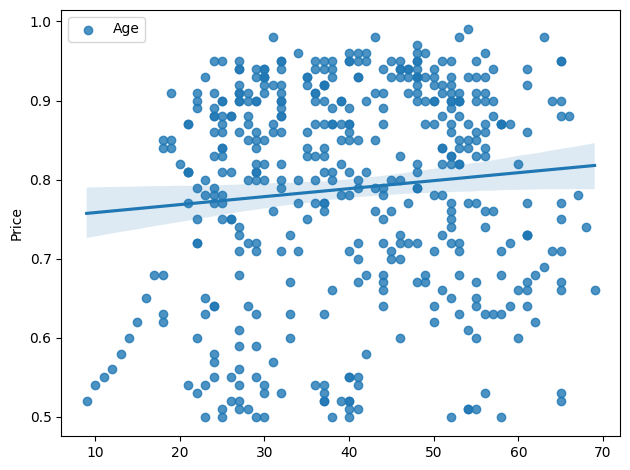

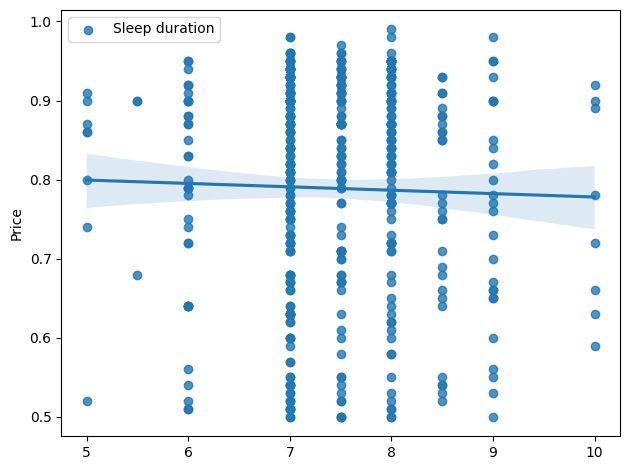

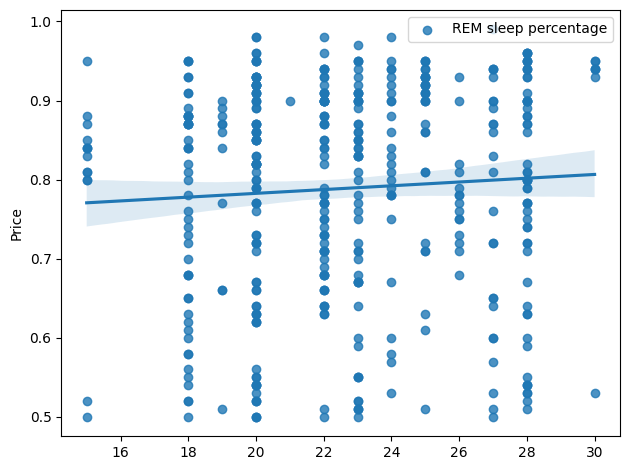

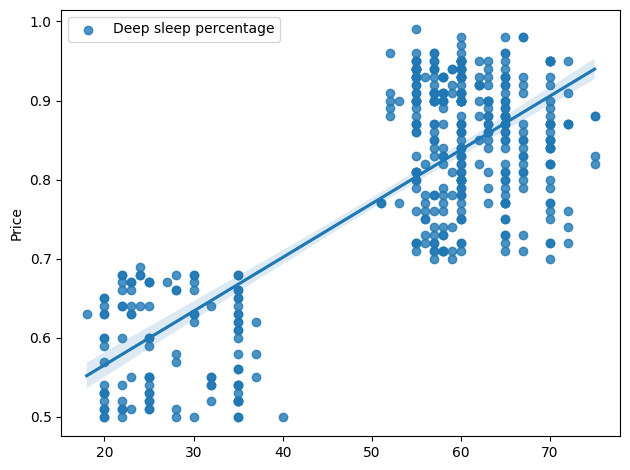

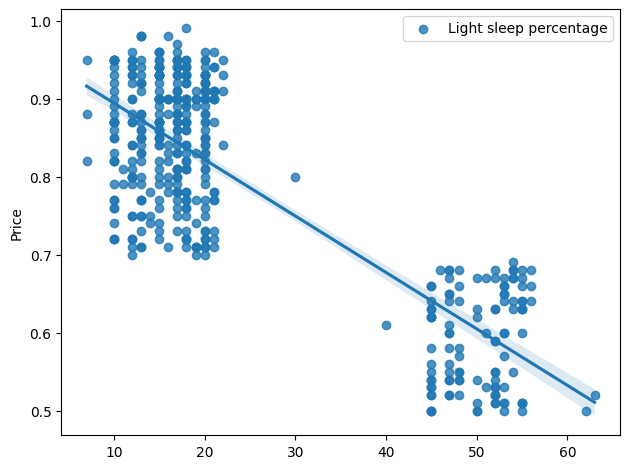

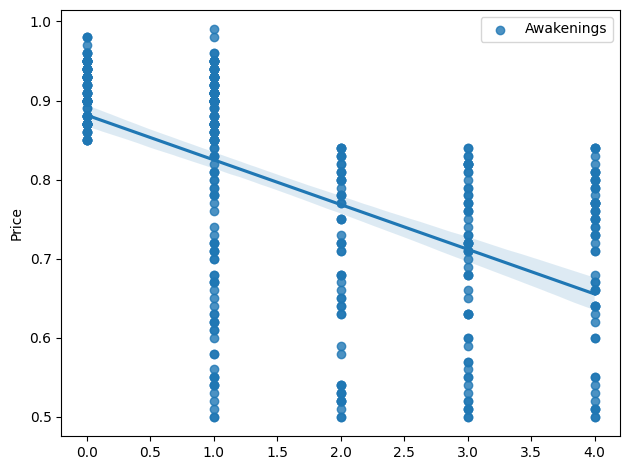

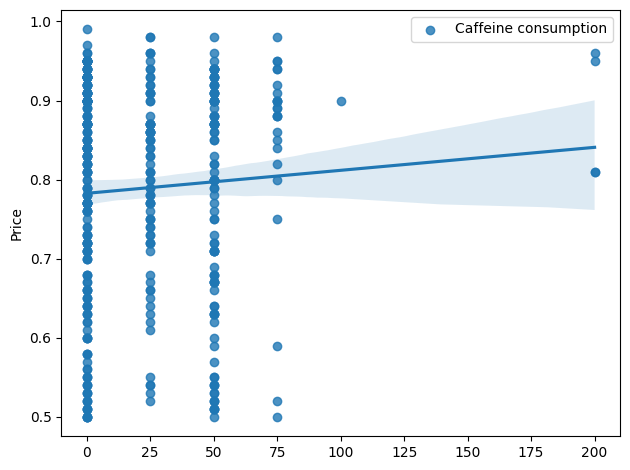

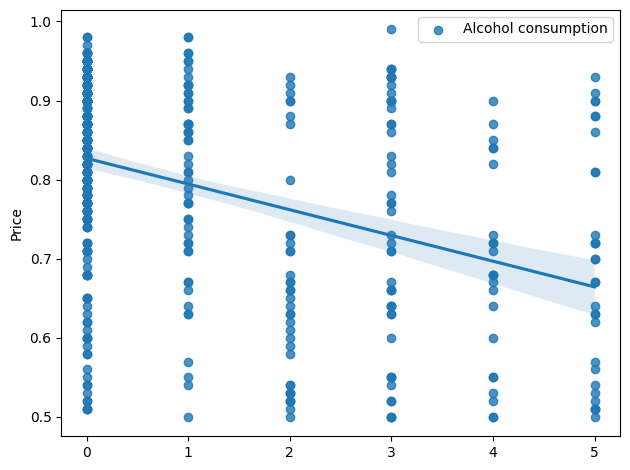

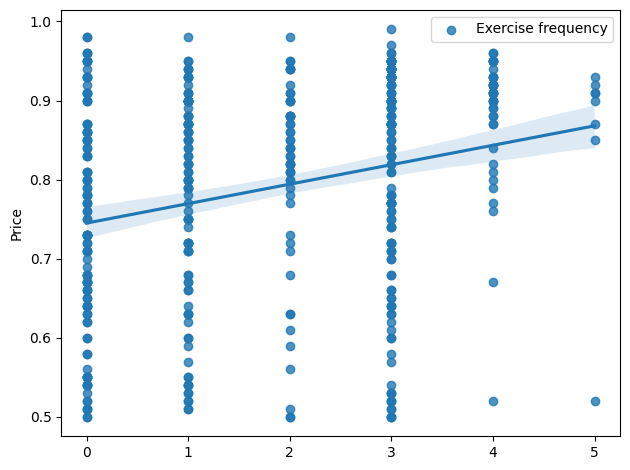

In [22]:
target = df[TARGET]
# we use a for loop to plot our independent variables against our dependent one:
for col in df.drop(
        columns=["Gender", "Smoking status", "Bedtime", "Wakeup time", TARGET]
    ):
    sns.regplot(x=df[col], y=target, data=df, label=col)
    plt.ylabel('Price')
    plt.xlabel('')
    plt.legend()
    plt.tight_layout()
    plt.show()


### BOXPLOT TARGET COLUMN

<Axes: ylabel='Sleep efficiency'>

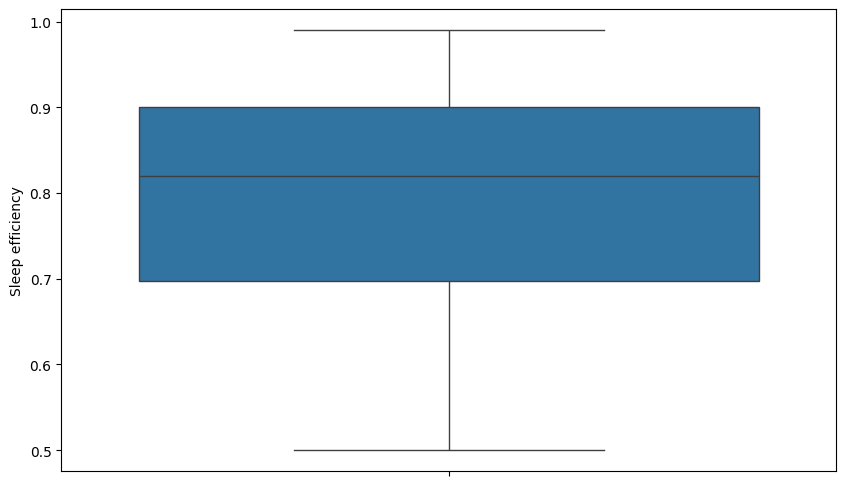

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(df[TARGET])

### HISTOGRAM TARGET COLUMN

<Axes: xlabel='Sleep efficiency', ylabel='Count'>

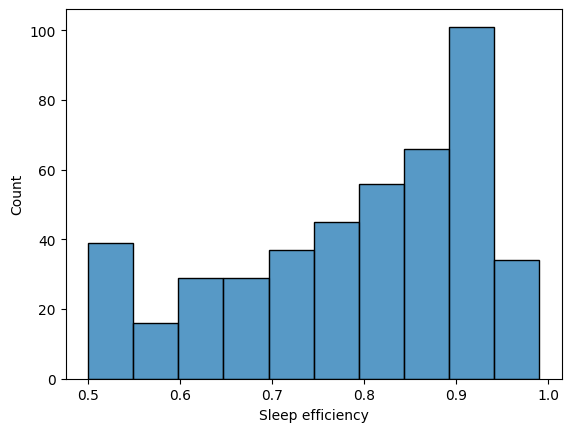

In [24]:
sns.histplot(df[TARGET])

### HISTOGRAM ALL COLUMNS

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Sleep duration'}>,
        <Axes: title={'center': 'Sleep efficiency'}>],
       [<Axes: title={'center': 'REM sleep percentage'}>,
        <Axes: title={'center': 'Deep sleep percentage'}>,
        <Axes: title={'center': 'Light sleep percentage'}>],
       [<Axes: title={'center': 'Awakenings'}>,
        <Axes: title={'center': 'Caffeine consumption'}>,
        <Axes: title={'center': 'Alcohol consumption'}>],
       [<Axes: title={'center': 'Exercise frequency'}>, <Axes: >,
        <Axes: >]], dtype=object)

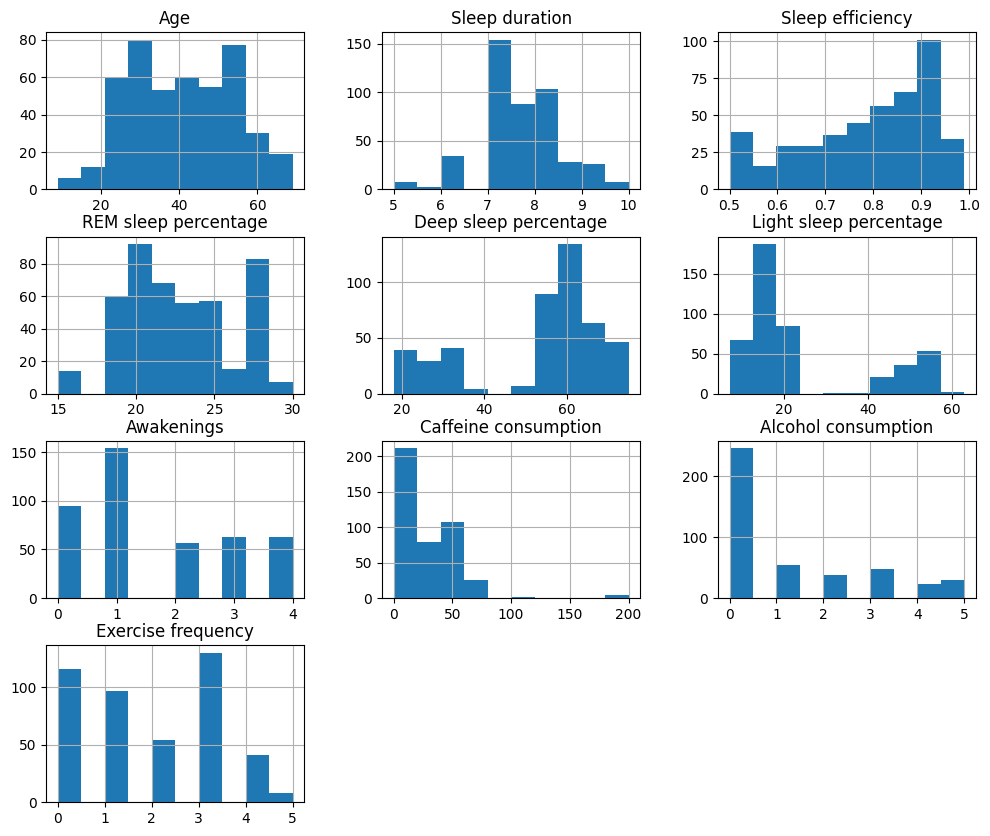

In [25]:
df.hist(figsize=(12, 10))

### CORRELATION MATRIX

Text(0.5, 1.0, 'Mapa Térmico da Correlação')

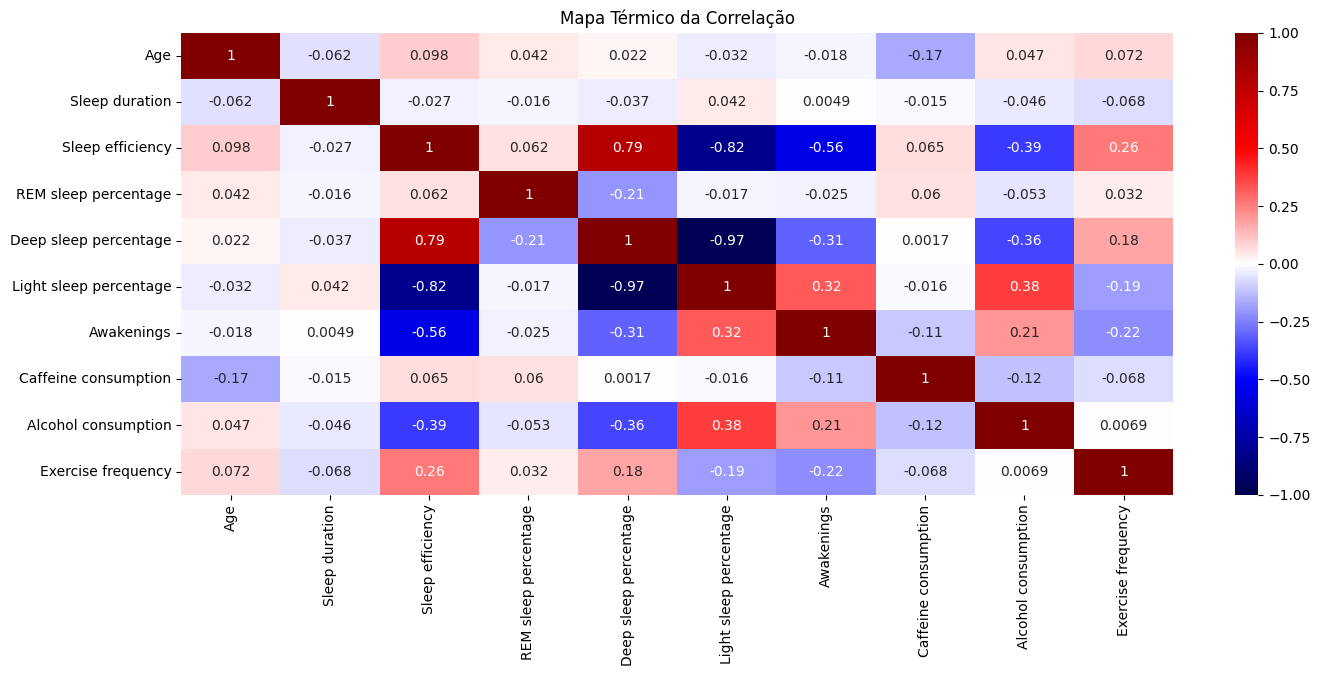

In [26]:
plt.figure(figsize=(16,6))
heatmap_corr = sns.heatmap(
    df.drop(
        columns=["Gender", "Smoking status", "Bedtime", "Wakeup time"]
    ).corr(),
    cmap='seismic', vmin=-1, vmax=1, annot=True)
plt.title('Mapa Térmico da Correlação')